In [1]:
from riotwatcher import LolWatcher, ApiError
import pandas as pd
api_key = 'RGAPI-a4de2f58-c735-4172-a0fc-f8e553c47bc0'
watcher = LolWatcher(api_key)
my_region = 'na1'
string_ID = 'HULKSMASH1337'
lol_tyler_1 = watcher.summoner.by_name(my_region, string_ID)
print(lol_tyler_1)

{'id': 'wzoROkOGV256lDuraz1SmF44aWZA23P_2xxNQqGxg0mZLqpn', 'accountId': 'LmXEidbyDIZ39ZzRRAngA7gA6wcxVN1fQEX1PwvyLq2ELFi3vP2ka_4N', 'puuid': 'lZRdO2wVxiR0YDg6ElcZD4uhXHhJNN49pCwxPLIHlQgo0pBJ8_TArbJaTkNp6NMKTLO8cPKPmhf1lQ', 'name': 'HULKSMASH1337', 'profileIconId': 3546, 'revisionDate': 1615616858000, 'summonerLevel': 217}


In [2]:
my_matches = watcher.match.matchlist_by_account(my_region,
                                                lol_tyler_1['accountId'])

In [3]:
count =0;                                                                       
for matchData in my_matches['matches']:
        count = count +1

In [6]:
participants =[]
alldata = {}
summoners = pd.DataFrame
counter = 0
for allMatch in range(count-1):
    last_match = my_matches['matches'][allMatch]
    match_detail = watcher.match.by_id(my_region, last_match['gameId'])
    find_tyler = match_detail['participants']
    for names in match_detail['participantIdentities']:                     
        rowSum = {}                                                         
        rowSum['Game #'] = allMatch                                         
        rowSum['Participant ID']= names['participantId']                    
        rowSum['Summoner Name'] = names['player']['summonerName']
        if names['player']['summonerName'] == string_ID:
            summoner_ID = rowSum['Participant ID']
            for row in find_tyler:
                stats_row = row['stats']
                if stats_row['participantId'] == summoner_ID:
                    instance_df = pd.DataFrame
                    summoner_stats ={}
                    #summoner_stats['outcome'] = stats_row['win']
                    if stats_row['win'] == True:
                        summoner_stats['outcome'] = 1
                    else:
                        summoner_stats['outcome'] = 0
                    summoner_stats['kills'] = stats_row['kills']
                    summoner_stats['deaths'] = stats_row['deaths']
                    summoner_stats['assists'] = stats_row['assists']
                    summoner_stats['totalDamageDealt'] = stats_row['totalDamageDealt']
                    summoner_stats['damageDealtToObjectives'] = stats_row['damageDealtToObjectives']
                    summoner_stats['totalDamageDealtToChampions'] = stats_row['totalDamageDealtToChampions']
                    summoner_stats['goldEarned'] = stats_row['goldEarned']
                    summoner_stats['totalMinionsKilled'] = stats_row['totalMinionsKilled']
                    alldata[counter] = summoner_stats
                    counter = counter +1         

In [7]:
data_transformed_df = pd.DataFrame.from_dict(alldata).T

In [8]:
data_transformed_df.head()

,outcome,kills,deaths,assists,totalDamageDealt,damageDealtToObjectives,totalDamageDealtToChampions,goldEarned,totalMinionsKilled
0,1,5,4,9,100105,9147,16221,9564,132
1,0,0,7,0,36840,2144,5221,3596,74
2,0,4,6,4,85930,2511,11753,9608,132
3,0,1,10,16,28367,879,9674,8296,37
4,0,2,7,4,72468,2375,13301,7106,109


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
X = data_transformed_df[['kills','deaths','assists','totalDamageDealt',
              'damageDealtToObjectives','totalDamageDealtToChampions','goldEarned','totalMinionsKilled']]
y = data_transformed_df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
from sklearn.metrics import classification_report
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
y_prob = y_prob[:,1]
print(X_test)
print(classification_report(y_test, y_pred))

    kills  deaths  assists  totalDamageDealt  damageDealtToObjectives  \
74      2       3        2            107085                      929   
19      7       0        7            202949                    26872   
50      2       6        0             68349                      849   
82      3       6       29            392265                    13390   
8      10       6       18            141475                     5612   
40      2       7       20             38095                     5678   
90      2       5        5             97058                       94   
5       2       6        1             86829                     4255   
3       1      10       16             28367                      879   
80      9       6       23            148840                    16462   
54      3       2        5            135341                     6425   
94      0       3        1             58433                        0   
78      7       5       15            179240       

Text(0.5, 1.0, 'HULKSMASH1337')

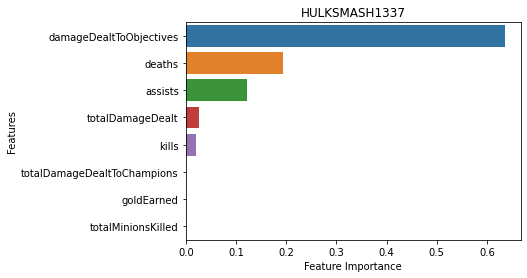

In [11]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
import seaborn as sns
import matplotlib.pyplot as plt
plot1 = plt.figure(1)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title(string_ID)

In [25]:
# df2 = data_transformed_df.iloc[[0]]
# DF1 = df2.drop(columns=['outcome'])
mean_data = data_transformed_df.mean(axis=0)
mean_data.to_frame().T.drop(columns=['outcome'])

,kills,deaths,assists,totalDamageDealt,damageDealtToObjectives,totalDamageDealtToChampions,goldEarned,totalMinionsKilled
0,4.010101,4.676768,7.141414,115629.555556,7016.484848,13268.313131,9787.373737,141.040404


In [20]:
y_pred = model.predict(mean_data)
if y_pred == 1:
    print('The predicted outcome of the last game was a win')
else:
    print('The predicted outcome of the last game was a loss')

ValueError: Expected 2D array, got 1D array instead:
array=[4.74747479e-01 4.01010084e+00 4.67676783e+00 7.14141417e+00
 1.15629555e+05 7.01648486e+03 1.32683135e+04 9.78737402e+03
 1.41040405e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#watcher.spectator.by_summoner(my_region,lol_tyler_1['id'])
plt.plot(y_test,'o', color='black')

## Use seglearn to predict the trajectory of the next game?